# Symbolic and Numerical Analysis of the Simple Pendulum

This notebook explores the behavior of a simple pendulum using symbolic and numerical methods. It demonstrates how Python can be used to derive and solve physical equations, analyze energy conservation, study stability, and visualize motion. The pendulum model is a classical nonlinear system used in physics and engineering, and this project highlights a scientific programming approach to investigating its dynamics.

## 1. Symbolic Setup

In [1]:

import sympy as sp
sp.init_printing()
t = sp.symbols('t')
theta = sp.Function('theta')(t)
g, l, m = sp.symbols('g l m', positive=True)
pendulum_eq = sp.Eq(theta.diff(t, 2) + (g / l) * sp.sin(theta), 0)
small_angle_eq = pendulum_eq.subs(sp.sin(theta), theta)
symbolic_solution = sp.dsolve(small_angle_eq, theta)
symbolic_solution


             ⎛√g⋅t⎞         ⎛√g⋅t⎞
θ(t) = C₁⋅sin⎜────⎟ + C₂⋅cos⎜────⎟
             ⎝ √l ⎠         ⎝ √l ⎠

## 2. Symbolic Energy Expressions

In [2]:

omega = theta.diff(t)
kinetic_energy = (1/2) * m * (l * omega)**2
potential_energy = m * g * l * (1 - sp.cos(theta))
kinetic_energy, potential_energy


⎛                   2                       ⎞
⎜     2   ⎛d       ⎞                        ⎟
⎜0.5⋅l ⋅m⋅⎜──(θ(t))⎟ , g⋅l⋅m⋅(1 - cos(θ(t)))⎟
⎝         ⎝dt      ⎠                        ⎠

## 3. Stability Analysis

In [3]:

theta_eq, omega_eq = sp.symbols('theta_eq omega_eq')
f1 = omega_eq
f2 = -(g/l)*sp.sin(theta_eq)
J = sp.Matrix([[sp.diff(f1, theta_eq), sp.diff(f1, omega_eq)],
               [sp.diff(f2, theta_eq), sp.diff(f2, omega_eq)]])
J_at_eq = J.subs({theta_eq:0, omega_eq:0})
eigenvals = J_at_eq.eigenvals()
J_at_eq, eigenvals


⎛⎡ 0   1⎤                      ⎞
⎜⎢      ⎥  ⎧-ⅈ⋅√g      ⅈ⋅√g   ⎫⎟
⎜⎢-g    ⎥, ⎨──────: 1, ────: 1⎬⎟
⎜⎢───  0⎥  ⎩  √l        √l    ⎭⎟
⎝⎣ l    ⎦                      ⎠

## 4. Numerical Solution with SciPy

In [4]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def pendulum_ode(t, y, g, l):
    theta, omega = y
    return [omega, -(g / l) * np.sin(theta)]

g_val, l_val, m_val = 9.81, 1.0, 1.0
t_span = [0, 20]
t_eval = np.linspace(0, 20, 1000)
initial_conditions = [[np.pi / 6, 0], [np.pi / 3, 0], [np.pi / 2, 0]]

solutions = [
    solve_ivp(pendulum_ode, t_span, ic, args=(g_val, l_val), t_eval=t_eval)
    for ic in initial_conditions
]

print("Sample θ(t) values for θ₀ = π/6:")
print(solutions[0].y[0][:10])


Matplotlib is building the font cache; this may take a moment.


Sample θ(t) values for θ₀ = π/6:
[0.52359878 0.52261609 0.51967242 0.51477843 0.50794936 0.49920754
 0.48858238 0.47611038 0.46183516 0.44580743]


## 5. Energy Conservation

In [5]:

energy_data = []
for sol in solutions:
    theta_vals, omega_vals = sol.y
    T = 0.5 * m_val * (l_val * omega_vals)**2
    V = m_val * g_val * l_val * (1 - np.cos(theta_vals))
    E = T + V
    energy_data.append((T, V, E))

for idx, (T, V, E) in enumerate(energy_data):
    print(f"θ₀ = {initial_conditions[idx][0]:.2f} → Max E: {np.max(E):.3f}, Min E: {np.min(E):.3f}")


θ₀ = 0.52 → Max E: 1.316, Min E: 1.297
θ₀ = 1.05 → Max E: 4.909, Min E: 4.733
θ₀ = 1.57 → Max E: 9.853, Min E: 9.618


## 6. Fourier Analysis

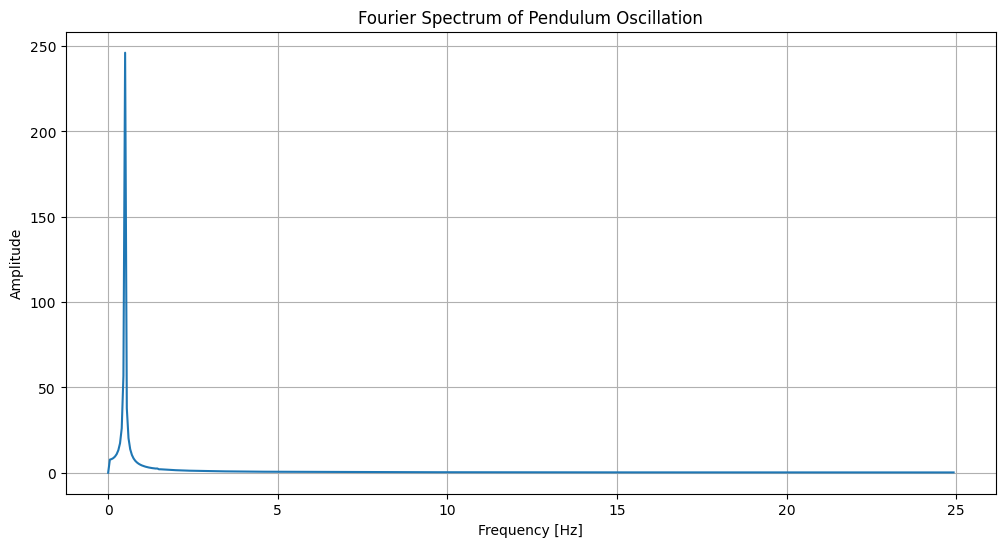

In [6]:

from numpy.fft import fft, fftfreq

def fourier_analysis(theta_vals, t_eval):
    N, dt = len(t_eval), t_eval[1] - t_eval[0]
    freq = fftfreq(N, dt)
    fft_theta = fft(theta_vals - np.mean(theta_vals))
    plt.figure(figsize=(12, 6))
    plt.plot(freq[:N//2], np.abs(fft_theta)[:N//2])
    plt.title('Fourier Spectrum of Pendulum Oscillation')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

fourier_analysis(solutions[0].y[0], t_eval)


## 7. Visualization

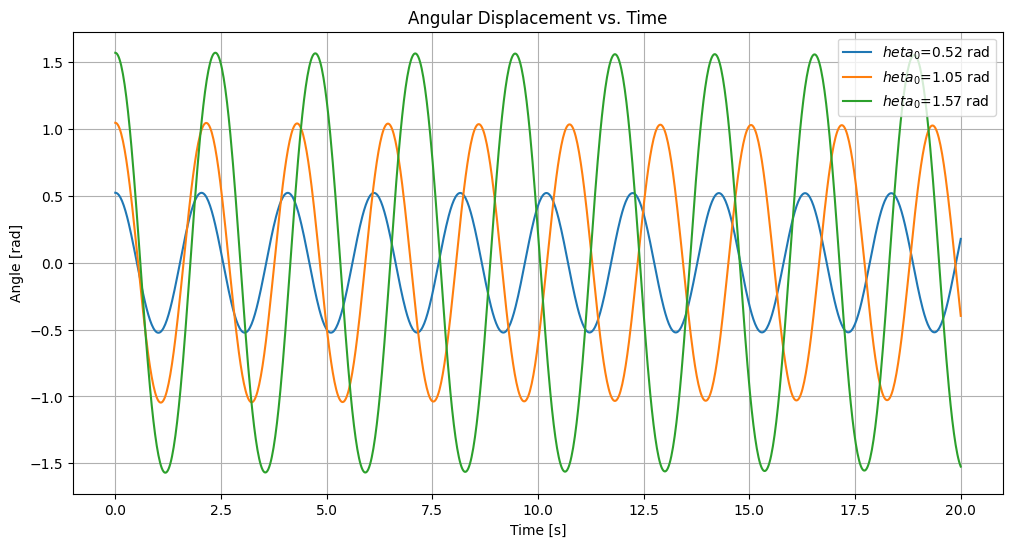

In [7]:

plt.figure(figsize=(12, 6))
for sol, ic in zip(solutions, initial_conditions):
    plt.plot(sol.t, sol.y[0], label=f'$\theta_0$={ic[0]:.2f} rad')
plt.title('Angular Displacement vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.grid(True)
plt.show()


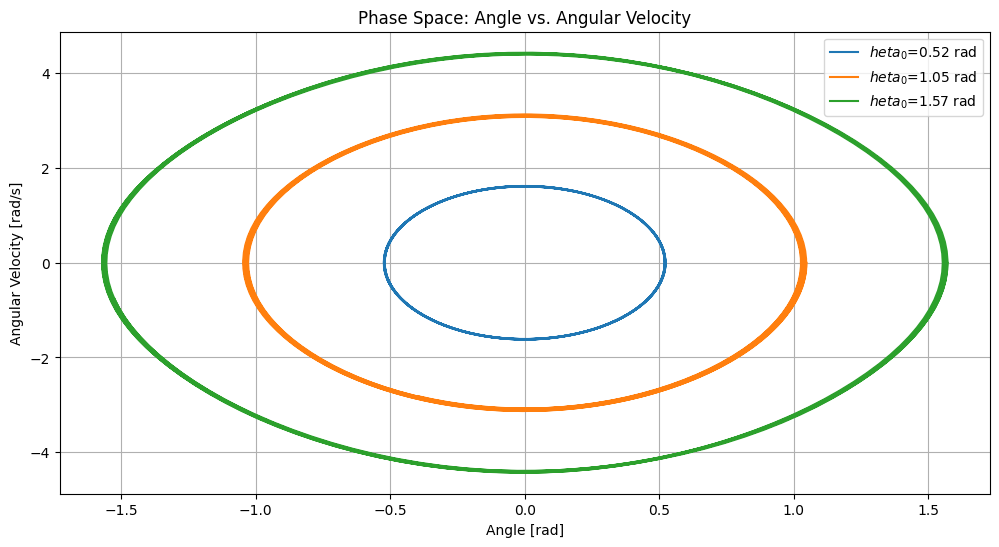

In [8]:

plt.figure(figsize=(12, 6))
for sol, ic in zip(solutions, initial_conditions):
    plt.plot(sol.y[0], sol.y[1], label=f'$\theta_0$={ic[0]:.2f} rad')
plt.title('Phase Space: Angle vs. Angular Velocity')
plt.xlabel('Angle [rad]')
plt.ylabel('Angular Velocity [rad/s]')
plt.legend()
plt.grid(True)
plt.show()


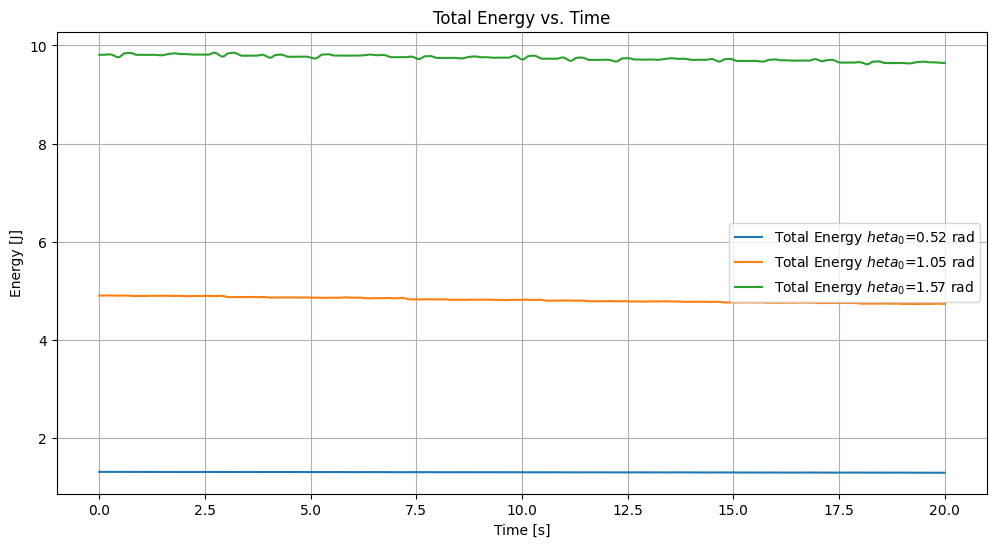

In [9]:

plt.figure(figsize=(12, 6))
for idx, (T, V, E) in enumerate(energy_data):
    plt.plot(t_eval, E, label=f'Total Energy $\theta_0$={initial_conditions[idx][0]:.2f} rad')
plt.title('Total Energy vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Energy [J]')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

This project presents a complete Python-based solution to the nonlinear pendulum problem. Symbolic math enables derivation of energy and stability expressions, while numerical solvers simulate realistic dynamics. Energy conservation is confirmed numerically, and frequency behavior is analyzed using FFT. The combination of symbolic and numerical methods demonstrates how scientific programming can be used to model and analyze physical systems in depth.